In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
inningsDf = pd.read_csv("./data/innings.csv")
inningsDf = inningsDf.drop(inningsDf.columns[0], axis=1)

inningsDf.head()

,id,innings,batsman,bowler,non-striker,bat_runs,extra_runs,total_runs,player_out,kind,fielders,wicket
0,548356,1st,DJ Harris,Z Khan,S Dhawan,1,0,1,NaN,NaN,NaN,False
1,548356,1st,S Dhawan,Z Khan,DJ Harris,4,0,4,NaN,NaN,NaN,False
2,548356,1st,S Dhawan,Z Khan,DJ Harris,0,0,0,NaN,NaN,NaN,False
3,548356,1st,S Dhawan,Z Khan,DJ Harris,0,1,1,NaN,NaN,NaN,False
4,548356,1st,S Dhawan,Z Khan,DJ Harris,4,0,4,NaN,NaN,NaN,False


In [4]:
inningsDf.columns

Index(['id', 'innings', 'batsman', 'bowler', 'non-striker', 'bat_runs',
       'extra_runs', 'total_runs', 'player_out', 'kind', 'fielders', 'wicket'],
      dtype='object')

In [5]:
total_runs = inningsDf.groupby(["batsman"])["bat_runs"].sum()
total_balls = inningsDf.groupby(["batsman"])["bat_runs"].count()

In [6]:
total_runs.nlargest()

batsman
V Kohli      5396
SK Raina     5291
RG Sharma    4800
DA Warner    4706
S Dhawan     4528
Name: bat_runs, dtype: int64

In [7]:
total_balls.nlargest()

batsman
V Kohli      4202
SK Raina     3968
RG Sharma    3732
S Dhawan     3732
G Gambhir    3524
Name: bat_runs, dtype: int64

In [8]:
strike_rate = total_runs*100/total_balls 
strike_rate.nlargest(5)

batsman
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
SE Rutherford    179.166667
SN Thakur        178.947368
Name: bat_runs, dtype: float64

In [9]:
per_ball_stats = inningsDf.groupby(["batsman"])["bat_runs"].value_counts().rename("stats")
# per_ball_stats
per_ball_stats_df = per_ball_stats.to_frame().reset_index()

In [10]:
def ball_stats(n, df):
    return df[per_ball_stats_df.bat_runs == n 
             ].sort_values(["stats"], ascending = [0])
ball_stats(4, per_ball_stats_df).head(5)

,batsman,bat_runs,stats
1812,S Dhawan,4,516
669,G Gambhir,4,492
1941,SK Raina,4,487
2225,V Kohli,4,479
493,DA Warner,4,458


In [11]:
inningsDf[inningsDf.wicket].kind.unique()

array(['run out', 'caught and bowled', 'caught', 'bowled', 'lbw',
       'stumped', 'hit wicket', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [12]:
wicketsDf = inningsDf[inningsDf.wicket]
bowler_wickets_df = wicketsDf[~wicketsDf.kind.isin( ['run out',
                             'retired hurt', 'obstructing the field'])]


In [14]:
total_wickets = bowler_wickets_df.groupby(["bowler"])["wicket"].count()
total_wickets.nlargest()

bowler
SL Malinga         166
A Mishra           152
PP Chawla          150
DJ Bravo           145
Harbhajan Singh    144
Name: wicket, dtype: int64

In [15]:
total_runs_bowler = inningsDf.groupby(["bowler"])["total_runs"].sum()
total_balls_bowler = inningsDf.groupby(["bowler"])["total_runs"].count()
economy = (total_runs_bowler*6) / total_balls_bowler
economy.nsmallest()

bowler
AC Gilchrist    0.000000
NB Singh        4.320000
S Dube          4.363636
AS Roy          4.400000
Sachin Baby     4.800000
Name: total_runs, dtype: float64

In [16]:
matchesDf = pd.read_csv("./data/matches.csv")
matchesDf = matchesDf.drop(matchesDf.columns[0], axis=1)

matchesDf.head()

,city,date,dl_applied,eliminator,id,overs,player_of_match,result,season,team1,team2,toss_decision,toss_winner,umpire1,umpire2,umpire3,venue,win_by_runs,win_by_wickets,winner
0,Dharamsala,2010-04-18,NaN,NaN,419159,20,MS Dhoni,NaN,2010,Kings XI Punjab,Chennai Super Kings,field,Chennai Super Kings,BF Bowden,AM Saheba,NaN,Himachal Pradesh Cricket Association Stadium,NaN,6.0,Chennai Super Kings
1,Chennai,2010-03-31,NaN,NaN,419133,20,M Vijay,NaN,2010,Chennai Super Kings,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,BG Jerling,RE Koertzen,NaN,"MA Chidambaram Stadium, Chepauk",NaN,5.0,Chennai Super Kings
2,Delhi,2010-03-29,NaN,NaN,419131,20,DA Warner,NaN,2010,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,SS Hazare,SJA Taufel,NaN,Feroz Shah Kotla,40.0,NaN,Delhi Daredevils
3,Pune,2013-04-30,NaN,NaN,598038,20,MS Dhoni,NaN,2013,Pune Warriors,Chennai Super Kings,bat,Chennai Super Kings,S Das,SJA Taufel,NaN,Subrata Roy Sahara Stadium,37.0,NaN,Chennai Super Kings
4,Jaipur,2012-05-13,NaN,NaN,548365,20,A Chandila,NaN,2012,Rajasthan Royals,Pune Warriors,bat,Rajasthan Royals,BF Bowden,SK Tarapore,NaN,Sawai Mansingh Stadium,45.0,NaN,Rajasthan Royals


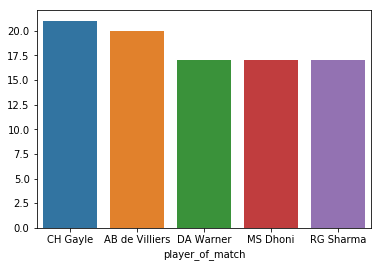

In [17]:
man_of_match = matchesDf.groupby(["player_of_match"])["player_of_match"].count()
top_5_mom = man_of_match.nlargest(5)
sns.barplot(top_5_mom.index, top_5_mom.values)

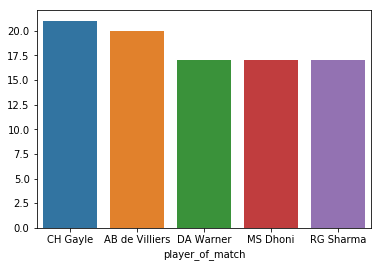

In [18]:
man_of_match = matchesDf.groupby(["player_of_match"])["player_of_match"].count()
top_5_mom = man_of_match.nlargest(5)
sns.barplot(top_5_mom.index, top_5_mom.values)